In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path import
path = r'C:\Users\guzic\Contacts\Instacart Grocery Basket Analysis'

In [4]:
# pickel file import

ords_prods_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepped Data', 'ords_prods_cust_merged2.pkl'))

MemoryError: 

In [4]:
# import checks

ords_prods_cust_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,dependants,fam_status,income,region,activity_flag,generation,economic_class,parent_status,day_of_week,department_name
0,2539329,1,1,2,8,100000,196,1,0,both,...,3,married,40423,South,Active,"Millenial, 25-41","Lower, less than $52200",Parent,Monday,Beverages
1,2398795,1,2,3,7,15.0,196,1,1,both,...,3,married,40423,South,Active,"Millenial, 25-41","Lower, less than $52200",Parent,Tuesday,Beverages
2,473747,1,3,3,12,21.0,196,1,1,both,...,3,married,40423,South,Active,"Millenial, 25-41","Lower, less than $52200",Parent,Tuesday,Beverages
3,2254736,1,4,4,7,29.0,196,1,1,both,...,3,married,40423,South,Active,"Millenial, 25-41","Lower, less than $52200",Parent,Wednesday,Beverages
4,431534,1,5,4,15,28.0,196,1,1,both,...,3,married,40423,South,Active,"Millenial, 25-41","Lower, less than $52200",Parent,Wednesday,Beverages


In [5]:
# shape check

ords_prods_cust_merge.shape

(30964564, 38)

In [5]:
ords_prods_cust_merge['prices'].max()

99999.0

In [6]:
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_the_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'frequency_customer', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'dependants', 'fam_status',
       'income', 'region', 'activity_flag', 'generation', 'economic_class',
       'parent_status', 'day_of_week', 'department_name'],
      dtype='object')

In [12]:
# Instacart has a lot of products with different price tags. Marketing and sales want to use
# simpler price range groupings to help direct their efforts

ords_prods_cust_merge.groupby(['prices'])['price_range_loc'].value_counts(dropna = False)

prices   price_range_loc   
1.0      Low-range product     109262
1.1      Low-range product     232337
1.2      Low-range product     242681
1.3      Low-range product     407143
1.4      Low-range product     374799
                                ...  
24.8     High-range product       386
24.9     High-range product      5466
25.0     High-range product     13128
14900.0  High-range product      4223
99999.0  High-range product       654
Name: price_range_loc, Length: 242, dtype: int64

In [13]:
ords_prods_cust_merge['price_range_loc'].value_counts(dropna = False)

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

In [5]:
prods_freq = ords_prods_cust_merge.groupby('product_name').agg({'add_to_cart_order': ['sum']})

In [6]:
prods_freq

,add_to_cart_order
,sum
product_name,
#2 Coffee Filters,6948
#2 Cone White Coffee Filters,96
#2 Mechanical Pencils,62
#4 Natural Brown Coffee Filters,2430
#NAME?,191
...,...
with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,171
with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,473


In [8]:
prods_freq.to_clipboard()

In [10]:
dept_freq = ords_prods_cust_merge.groupby('department_name').agg({'add_to_cart_order': ['sum']})

In [11]:
dept_freq

,add_to_cart_order
,sum
department_name,
Alcohol,787433
Babies,4341083
Bakery,9079169
Beverages,17973374
Breakfast,6134484
Bulk,280800
Canned Goods,10089479
Dairy Eggs,38851163


In [12]:
dept_freq.to_clipboard()

In [21]:
price_per_day = ords_prods_cust_merge.groupby('day_of_week').agg({'prices': ['mean']})

In [23]:
price_per_day.sort_index()

,prices
,mean
day_of_week,
Friday,11.227473
Monday,12.352313
Saturday,11.129771
Sunday,12.119207
Thursday,12.914762
Tuesday,12.147201
Wednesday,12.029071


In [13]:
price_per_hour = ords_prods_cust_merge.groupby('time_of_order').agg({'prices': ['mean']})

In [14]:
price_per_hour.sort_index()

,prices
,mean
time_of_order,
0,10.491177
1,9.980347
2,14.863998
3,13.236278
4,12.452253
5,12.846391
6,11.915574
7,12.279888


In [17]:
price_per_hour.to_clipboard()

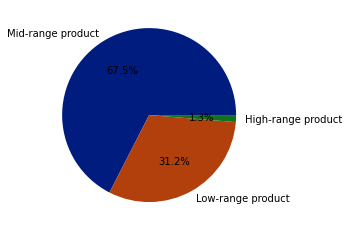

In [72]:
price_range_pie = ords_prods_cust_merge['price_range_loc'].value_counts().plot.pie(autopct = '%1.1f%%', colors = sns.color_palette('dark',3)), plt.ylabel('')

In [68]:
# SAVE AS PNG FILE

In [28]:
ords_prods_cust_merge['price_range_loc'].value_counts(dropna = False)

Mid-range product     20891771
Low-range product      9674840
High-range product      397953
Name: price_range_loc, dtype: int64

In [73]:
price_range_sum = ords_prods_cust_merge.groupby('price_range_loc').agg({'prices' : ['sum']})

In [74]:
price_range_sum

,prices
,sum
price_range_loc,
High-range product,136424817.4
Low-range product,29255100.1
Mid-range product,203836364.1


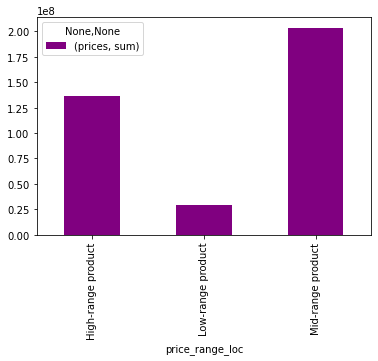

In [79]:
bar_price_range_sum = price_range_sum.plot.bar(color = 'purple')

In [81]:
bar_price_range_sum.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range_sum.png'))

In [83]:
sales_by_product = ords_prods_cust_merge.groupby('product_name').agg({'prices' : ['min', 'max', 'sum']})

In [84]:
sales_by_product

prices              
                                                      min   max     sum
product_name                                                           
#2 Coffee Filters                                    11.0  11.0  8283.0
#2 Cone White Coffee Filters                          5.7   5.7    74.1
#2 Mechanical Pencils                                 9.2   9.2    73.6
#4 Natural Brown Coffee Filters                       2.5   2.5   570.0
#NAME?                                                3.6   3.6   100.8
...                                                   ...   ...     ...
with Xylitol Unwrapped Original Flavor 50 Stick...    5.4   5.4   167.4
with Xylitol Unwrapped Spearmint 50 Sticks Suga...    5.2   5.2   280.8
with Xylitol Watermelon Twist 18 Sticks Sugar F...    3.5   3.5   238.0
with a Splash of Mango Coconut Water                  2.6   2.6    57.2
with a Splash of Pineapple Coconut Water              4.2   4.2   218.4

[49630 rows x 3 columns]

In [85]:
sales_by_product.to_clipboard()

In [92]:
sales_by_dept = ords_prods_cust_merge.groupby('department_name').agg({'prices' : ['min', 'max', 'mean', 'sum']})

In [93]:
sales_by_dept

prices                                 
                   min      max       mean          sum
department_name                                        
Alcohol            1.0     15.0   8.150699    1178811.1
Babies             1.0     15.0   7.634399    3133096.4
Bakery             1.0     15.0   7.857482    8806886.2
Beverages          1.0     15.0   7.682556   19758773.9
Breakfast          1.0     14.9   8.031647    5388030.2
Bulk               1.4     14.1   8.346919     279212.8
Canned Goods       1.0     15.0   7.546660    7637778.5
Dairy Eggs         1.0  99999.0  33.114599  171440306.7
Deli               1.0     15.0   7.783347    7813188.1
Dry Goods Pasta    1.0     15.0   7.349370    6042181.4
Frozen             1.0     15.0   7.733725   16408884.0
Household          1.0     15.0   7.379951    5164910.3
International      1.0     15.0   7.678797    1965702.9
Meat Seafood       8.0     25.0  16.300034   10998953.4
Missing            1.0     15.0   8.660655     560933.3
Other              1.1     15.0   6.961995     239569.2
Pantry             1.0     20.0   8.014482   14287456.5
Personal Care      1.0     15.0   7.998744    3393915.0
Pets               1.0     15.0   7.887489     734009.7
Produce            1.0     15.0   7.980348   72455761.7
Snacks             1.6      7.0   4.275555   11827920.3

In [94]:
sales_by_dept.to_clipboard()

In [96]:
sales_by_product_name = ords_prods_cust_merge.groupby('product_name').agg({'prices' : ['min', 'max', 'mean','sum']})

In [97]:
sales_by_product_name

prices                    
                                                      min   max  mean     sum
product_name                                                                 
#2 Coffee Filters                                    11.0  11.0  11.0  8283.0
#2 Cone White Coffee Filters                          5.7   5.7   5.7    74.1
#2 Mechanical Pencils                                 9.2   9.2   9.2    73.6
#4 Natural Brown Coffee Filters                       2.5   2.5   2.5   570.0
#NAME?                                                3.6   3.6   3.6   100.8
...                                                   ...   ...   ...     ...
with Xylitol Unwrapped Original Flavor 50 Stick...    5.4   5.4   5.4   167.4
with Xylitol Unwrapped Spearmint 50 Sticks Suga...    5.2   5.2   5.2   280.8
with Xylitol Watermelon Twist 18 Sticks Sugar F...    3.5   3.5   3.5   238.0
with a Splash of Mango Coconut Water                  2.6   2.6   2.6    57.2
with a Splash of Pineapple Coconut Water              4.2   4.2   4.2   218.4

[49630 rows x 4 columns]

In [98]:
sales_by_product_name.to_clipboard()

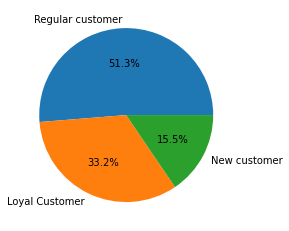

In [99]:
loyalty_pie = ords_prods_cust_merge['loyalty_flag'].value_counts().plot.pie(autopct = '%1.1f%%'),plt.ylabel('')

In [47]:
#Creating crosstab of 'frequency_flag' and 'loyalty_flag

In [51]:
loyalty_and_frequency = pd.crosstab(ords_prods_cust_merge['frequency_flag'], ords_prods_cust_merge['loyalty_flag'], dropna = False)

In [52]:
loyalty_and_frequency

loyalty_flag,Loyal Customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,10279636,1018332,9012665
Non-frequent customer,0,2415913,1242184
Regular customer,4457,1369450,5621927


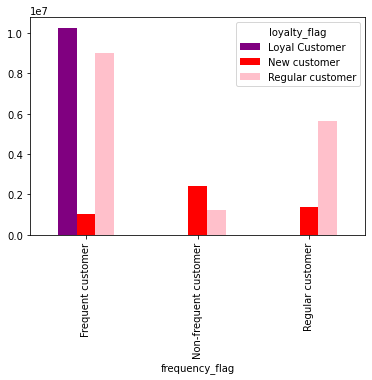

In [53]:
loyalty_and_frequency = loyalty_and_frequency.plot.bar(color =['purple', 'red', 'pink'])

In [55]:
bar_loyalty_and_frequency = loyalty_and_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_and_frequency.png'))

In [46]:
loyalty_age = pd.crosstab(ords_prods_cust_merge['loyalty_flag'], ords_prods_cust_merge['generation'], dropna = False)

In [47]:
loyalty_age

generation,"Boomers I, 67-76","Boomers II, 58-67","Gen-X, 42-57","Gen-Z, 18-25","Millenial, 25-41","Post War, 76-95=4","WWII, 95+"
loyalty_flag,,,,,,,
Loyal Customer,1457490,1405915,2620919,1128089,2545829,810734,315117
New customer,675681,673296,1213873,523093,1190139,376004,151609
Regular customer,2234474,2172311,3995009,1734879,3999216,1249314,491573


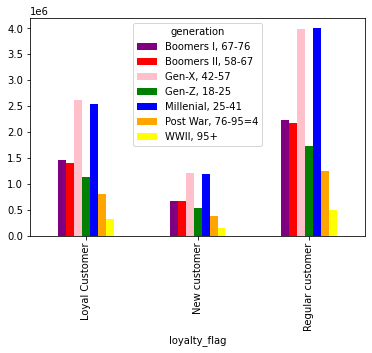

In [49]:
bar_loyalty_age = loyalty_age.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [50]:
bar_loyalty_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_age.png'))

In [128]:
region_and_freqency = pd.crosstab(ords_prods_cust_merge['region'], ords_prods_cust_merge['frequency_flag'], dropna = False)

In [129]:
region_and_freqency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest,3942637,721519,1386726
Northeast,3588160,636664,1239861
South,6775055,1217800,2318284
West,6004781,1082114,2050963


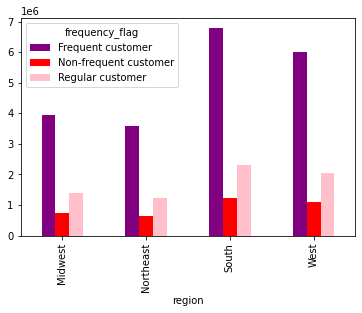

In [130]:
bar_region_freq = region_and_freqency.plot.bar(color =['purple', 'red', 'pink'])

In [132]:
bar_region_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_frequency.png'))

In [56]:
age_frequency = pd.crosstab(ords_prods_cust_merge['generation'], ords_prods_cust_merge['frequency_flag'], dropna = False)

In [57]:
age_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
generation,,,
"Boomers I, 67-76",2895721,505783,966141
"Boomers II, 58-67",2770451,517635,963436
"Gen-X, 42-57",5123881,930311,1775609
"Gen-Z, 18-25",2234308,395706,756047
"Millenial, 25-41",5066063,905302,1763819
"Post War, 76-95=4",1594057,288543,553452
"WWII, 95+",626152,114817,217330


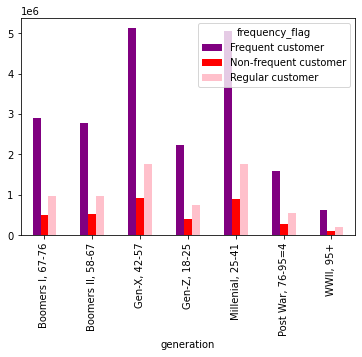

In [59]:
bar_age_freq = age_frequency.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [60]:
bar_age_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_freq.png'))

In [133]:
family_status_and_frequency = pd.crosstab(ords_prods_cust_merge['parent_status'], ords_prods_cust_merge['frequency_flag'], dropna = False)

In [134]:
family_status_and_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
parent_status,,,
Non-parent,5066668,911002,1762011
Parent,15243965,2747095,5233823


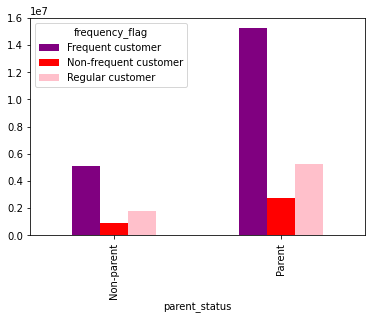

In [139]:
bar_fam_status_freq = family_status_and_frequency.plot.bar(color =['purple', 'red', 'pink'])

In [141]:
bar_fam_status_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_status_freq.png'))

In [69]:
#RAN AGGREGATES PREVIOUSLY! - Create graphs from thos if needed

In [143]:
sales_by_age = ords_prods_cust_merge.groupby('generation').agg({'prices' : ['sum']})

In [144]:
sales_by_age

,prices
,sum
generation,
"Boomers I, 67-76",51163558.8
"Boomers II, 58-67",49996695.8
"Gen-X, 42-57",94752870.6
"Gen-Z, 18-25",41895739.0
"Millenial, 25-41",92450186.0
"Post War, 76-95=4",28375161.1
"WWII, 95+",10882070.3


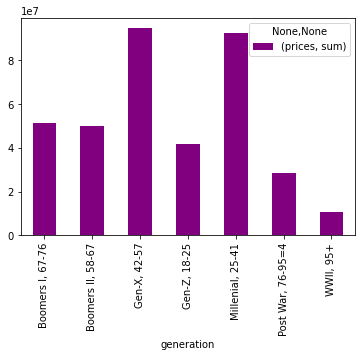

In [145]:
bar_sales_by_age = sales_by_age.plot.bar(color =['purple', 'red', 'pink'])

In [146]:
bar_sales_by_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_by_age.png'))

In [40]:
sales_by_region = ords_prods_cust_merge.groupby('region').agg({'prices' : ['sum']})

In [41]:
sales_by_region

,prices
,sum
region,
Midwest,76229694.5
Northeast,63076573.7
South,124959094.2
West,105250919.2


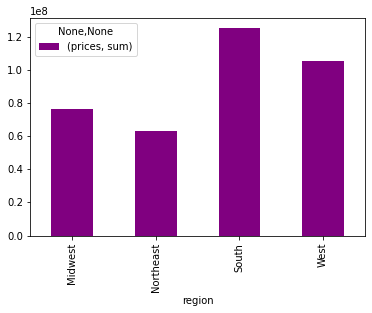

In [43]:
bar_sales_by_region = sales_by_region.plot.bar(color =['purple', 'red', 'pink'])

In [45]:
bar_sales_by_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_by_region.png'))

In [147]:
sales_by_income = ords_prods_cust_merge.groupby('economic_class').agg({'prices' : ['sum']})

In [148]:
sales_by_income

,prices
,sum
economic_class,
"Lower, less than $52200",24984623.8
Middle,235628698.3
"Upper, more than $156k",108902959.5


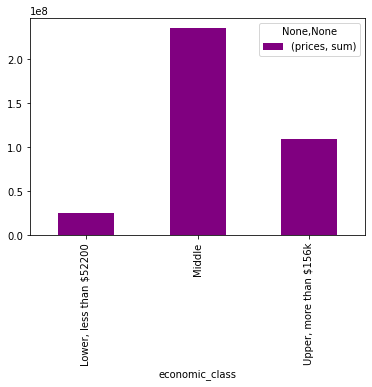

In [149]:
bar_sales_by_income = sales_by_income.plot.bar(color =['purple', 'red', 'pink'])

In [150]:
bar_sales_by_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sales_by_income.png'))

In [154]:
sales_by_family_status = ords_prods_cust_merge.groupby('parent_status').agg({'prices' : ['sum']})

In [155]:
sales_by_family_status

,prices
,sum
parent_status,
Non-parent,93670705.7
Parent,275845575.9


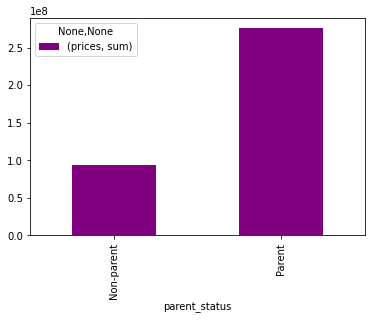

In [156]:
bar_fam_status_price = sales_by_family_status.plot.bar(color =['purple', 'red', 'pink'])

In [173]:
bar_fam_status_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_status_price.png'))

In [178]:
generation_order_time = ords_prods_cust_merge.groupby('generation').agg({'time_of_order' : ['mean']})

In [179]:
generation_order_time

,time_of_order
,mean
generation,
"Boomers I, 67-76",13.401660
"Boomers II, 58-67",13.418385
"Gen-X, 42-57",13.426925
"Gen-Z, 18-25",13.392835
"Millenial, 25-41",13.404279
"Post War, 76-95=4",13.426392
"WWII, 95+",13.369395


In [186]:
fam_status_order_time2 = ords_prods_cust_merge.groupby('parent_status').agg({'time_of_order' : ['mean']})

In [184]:
fam_status_order_time2

,time_of_order
,mean
parent_status,
Non-parent,13.421183
Parent,13.407581


In [19]:
age_spend_habit_day = pd.crosstab(ords_prods_cust_merge['day_of_week'], ords_prods_cust_merge['generation'], dropna = False)

In [20]:
age_spend_habit_day

generation,"Boomers I, 67-76","Boomers II, 58-67","Gen-X, 42-57","Gen-Z, 18-25","Millenial, 25-41","Post War, 76-95=4","WWII, 95+"
day_of_week,,,,,,,
Friday,609590,586164,1089754,469060,1056898,342932,136906
Monday,569216,555738,1027931,437727,999130,313031,121933
Saturday,833888,808070,1486021,643003,1486000,466767,184861
Sunday,751876,743393,1364160,592680,1364607,424952,170018
Thursday,568686,552350,1020369,444751,1005816,318890,122867
Tuesday,522793,507239,924849,401067,913125,288535,111927
Wednesday,511596,498568,916717,397773,909608,280945,109787


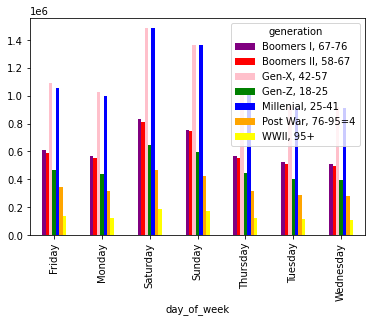

In [21]:
bar_age_spend_habit = age_spend_habit_day.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [22]:
bar_age_spend_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_spend_habit.png'))

In [126]:
age_spend_habit_hour = pd.crosstab(ords_prods_cust_merge['time_of_order'], ords_prods_cust_merge['generation'], dropna = False)

In [98]:
age_spend_habit_hour

generation,"Boomers I, 67-76","Boomers II, 58-67","Gen-X, 42-57","Gen-Z, 18-25","Millenial, 25-41","Post War, 76-95=4","WWII, 95+"
time_of_order,,,,,,,
0,27419,28373,52253,23305,53812,16196,6684
1,14365,14795,27504,12351,28200,8936,3470
2,9414,8571,15696,7678,16732,5430,2170
3,6784,6402,11475,5350,12603,4458,1724
4,7064,7971,11742,5831,12397,4050,1708
5,12765,12252,20277,9254,20541,6224,3105
6,39149,37439,69025,32655,69172,23109,10464
7,123928,118432,215919,94426,213176,69784,27548
8,236522,226896,420796,177528,414447,130987,51934


In [99]:
parent_status_spend_day = pd.crosstab(ords_prods_cust_merge['day_of_week'], ords_prods_cust_merge['parent_status'], dropna = False)

In [100]:
parent_status_spend_day

parent_status,Non-parent,Parent
day_of_week,,
Friday,1061197,3230107
Monday,1002581,3022125
Saturday,1477078,4431532
Sunday,1362350,4049336
Thursday,1014174,3019555
Tuesday,917042,2752493
Wednesday,905259,2719735


In [108]:
age_spend_habit_hour = pd.crosstab(ords_prods_cust_merge['time_of_order'], ords_prods_cust_merge['generation'], dropna = False)

In [109]:
age_spend_habit_hour

generation,"Boomers I, 67-76","Boomers II, 58-67","Gen-X, 42-57","Gen-Z, 18-25","Millenial, 25-41","Post War, 76-95=4","WWII, 95+"
time_of_order,,,,,,,
0,27419,28373,52253,23305,53812,16196,6684
1,14365,14795,27504,12351,28200,8936,3470
2,9414,8571,15696,7678,16732,5430,2170
3,6784,6402,11475,5350,12603,4458,1724
4,7064,7971,11742,5831,12397,4050,1708
5,12765,12252,20277,9254,20541,6224,3105
6,39149,37439,69025,32655,69172,23109,10464
7,123928,118432,215919,94426,213176,69784,27548
8,236522,226896,420796,177528,414447,130987,51934


In [29]:
region_spend_habit_day = pd.crosstab(ords_prods_cust_merge['day_of_week'], ords_prods_cust_merge['region'], dropna = False)

In [30]:
region_spend_habit_day

region,Midwest,Northeast,South,West
day_of_week,,,,
Friday,843231,750282,1429704,1268087
Monday,788979,713159,1340387,1182181
Saturday,1153265,1043698,1955352,1756295
Sunday,1052316,954332,1808348,1596690
Thursday,792238,716128,1342849,1182514
Tuesday,712543,649305,1229002,1078685
Wednesday,708310,637781,1205497,1073406


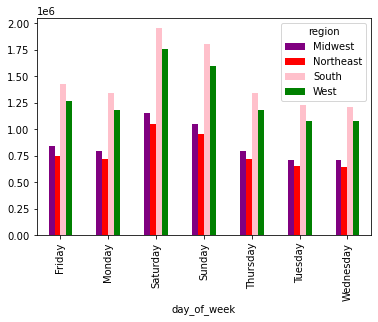

In [31]:
region_spend_habit_day = region_spend_habit_day.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [33]:
region_spend_habit_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spend_habit_day.png'))

In [37]:
region_spend_habit_hour = pd.crosstab(ords_prods_cust_merge['time_of_order'], ords_prods_cust_merge['region'], dropna = False)

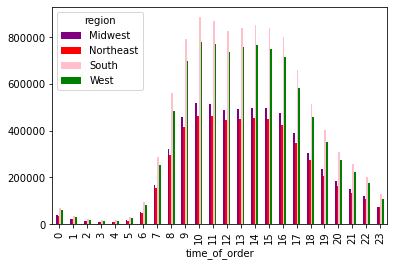

In [38]:
region_spend_habit_hour = region_spend_habit_hour.plot.bar(color =['purple', 'red', 'pink', 'green', 'blue', 'orange', 'yellow'])

In [39]:
region_spend_habit_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spend_habit_hour.png'))

In [103]:
region_department = pd.crosstab(ords_prods_cust_merge['department_name'], ords_prods_cust_merge['region'], dropna = False)

In [104]:
region_department

region,Midwest,Northeast,South,West
department_name,,,,
Alcohol,28812,25017,48813,41985
Babies,80063,72712,139511,118106
Bakery,218321,199300,371620,331587
Beverages,498599,462929,859419,750954
Breakfast,129977,117904,223172,199797
Bulk,6620,5599,11180,10052
Canned Goods,197519,176936,337458,300161
Dairy Eggs,1009320,914616,1723016,1530230
Deli,194490,178398,333620,297326


In [106]:
generation_department = pd.crosstab(ords_prods_cust_merge['department_name'], ords_prods_cust_merge['generation'], dropna = False)

In [107]:
generation_department

generation,"Boomers I, 67-76","Boomers II, 58-67","Gen-X, 42-57","Gen-Z, 18-25","Millenial, 25-41","Post War, 76-95=4","WWII, 95+"
department_name,,,,,,,
Alcohol,20358,19162,36174,16129,36652,10685,5467
Babies,57248,55916,105864,44420,102752,31145,13047
Bakery,156512,154164,285218,122266,278963,88787,34918
Beverages,368514,355703,655472,280201,633182,201140,77689
Breakfast,93442,91481,171130,74887,166483,52635,20792
Bulk,4861,4390,8414,3773,8348,2637,1028
Canned Goods,141200,139669,255721,110774,254387,79397,30926
Dairy Eggs,734408,705618,1306012,567387,1301457,403227,159073
Deli,141523,138791,252507,109048,251812,79018,31135


In [129]:
gen_parent_status = pd.crosstab(ords_prods_cust_merge['generation'], ords_prods_cust_merge['parent_status'], dropna = False)

In [130]:
gen_parent_status

parent_status,Non-parent,Parent
generation,,
"Boomers I, 67-76",1062180,3305465
"Boomers II, 58-67",1099855,3151667
"Gen-X, 42-57",1932484,5897317
"Gen-Z, 18-25",833972,2552089
"Millenial, 25-41",1947192,5787992
"Post War, 76-95=4",612107,1823945
"WWII, 95+",251891,706408


In [193]:
ords_prods_cust_merge.groupby('generation').agg({'prices' : ['mean', 'min', 'max']})

prices              
                        mean  min      max
generation                                
Boomers I, 67-76   11.714221  1.0  99999.0
Boomers II, 58-67  11.759717  1.0  99999.0
Gen-X, 42-57       12.101568  1.0  99999.0
Gen-Z, 18-25       12.373002  1.0  99999.0
Millenial, 25-41   11.951905  1.0  99999.0
Post War, 76-95=4  11.648011  1.0  99999.0
WWII, 95+          11.355611  1.0  99999.0